In [1]:
import os
import sys
import pdb
import copy
import importlib
import numpy as np
import xarray as xr
import cmasher as cmr
import matplotlib as mpl
from matplotlib import rc
from datetime import datetime
from matplotlib import gridspec
import matplotlib.pyplot as plt
from cftime import DatetimeNoLeap as date
from matplotlib.dates import DateFormatter

plt.rcParams.update({
    'font.size'       : 14,   # Base font size
    'axes.labelsize'  : 14,   # Axis labels
    'xtick.labelsize' : 13,   # X-axis tick labels
    'ytick.labelsize' : 13,   # Y-axis tick labels
    'legend.fontsize' : 12,   # Legend font size
    'figure.titlesize': 16    # Figure title size
})
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
#mpl.rc('text', usetex = True)
#mpl.rc('font', family = 'serif')

plt.ioff()

sys.path.insert(1, '/global/homes/j/jhollo/repos/climate_analysis/CLDERA/TEM/limvar_analysis_NERSC')
import plotting_utils as putil
import compute_ensemble_stats as ces
importlib.reload(putil)
importlib.reload(ces)

<module 'compute_ensemble_stats' from '/global/homes/j/jhollo/repos/climate_analysis/CLDERA/TEM/limvar_analysis_NERSC/compute_ensemble_stats.py'>

In [35]:
# ------ midlatitude average

freq='monthly'
pmin, pmax = 2, 100

# ----- NH
latmin, latmax = 20, 40
vargs = {'skip_nosrctag':True, 'freq':freq, 
         'latmin':latmin, 'latmax':latmax, 'pmin':pmin, 'pmax':pmax,
         'average_lat':True, 'average_time':False, 'average_pres':False}

aoa_nh_10 = putil.get_variable('AOA', **vargs, mass=10)
aoa_nh_15 = putil.get_variable('AOA', **vargs, mass=15)
e90_nh_10 = putil.get_variable('E90j', **vargs, mass=10)
e90_nh_15 = putil.get_variable('E90j', **vargs, mass=15)

# ----- SH
latmin, latmax = -40, -20
vargs = {'skip_nosrctag':True, 'freq':freq, 
         'latmin':latmin, 'latmax':latmax, 'pmin':pmin, 'pmax':pmax,
         'average_lat':True, 'average_time':False, 'average_pres':False}

aoa_sh_10 = putil.get_variable('AOA', **vargs, mass=10)
aoa_sh_15 = putil.get_variable('AOA', **vargs, mass=15)
e90_sh_10 = putil.get_variable('E90j', **vargs, mass=10)
e90_sh_15 = putil.get_variable('E90j', **vargs, mass=15)

# ---- dims
time = [datetime(t.year, t.month, t.day) for t in aoa_nh_10['cfmean'].time.values]
plev = aoa_nh_10['cfmean'].plev


-------- processing ensemble zonal mean data...
merging data
ensemble members found: 15
doing latitude slicing and averaging...
doing vertical slicing and averaging...
data shape after member concat and slicing: (15, 18, 91)
cf shape after member concat and slicing: (15, 18, 91)
getting impact
getting data ensemble mean
getting cf ensemble mean
getting impact ensemble mean
getting ttest
getting coherence
done

-------- processing ensemble zonal mean data...
merging data
ensemble members found: 15
doing latitude slicing and averaging...
doing vertical slicing and averaging...
data shape after member concat and slicing: (15, 18, 91)
cf shape after member concat and slicing: (15, 18, 91)
getting impact
getting data ensemble mean
getting cf ensemble mean
getting impact ensemble mean
getting ttest
getting coherence
done

-------- processing ensemble zonal mean data...
merging data
ensemble members found: 15
doing latitude slicing and averaging...
doing vertical slicing and averaging...
dat

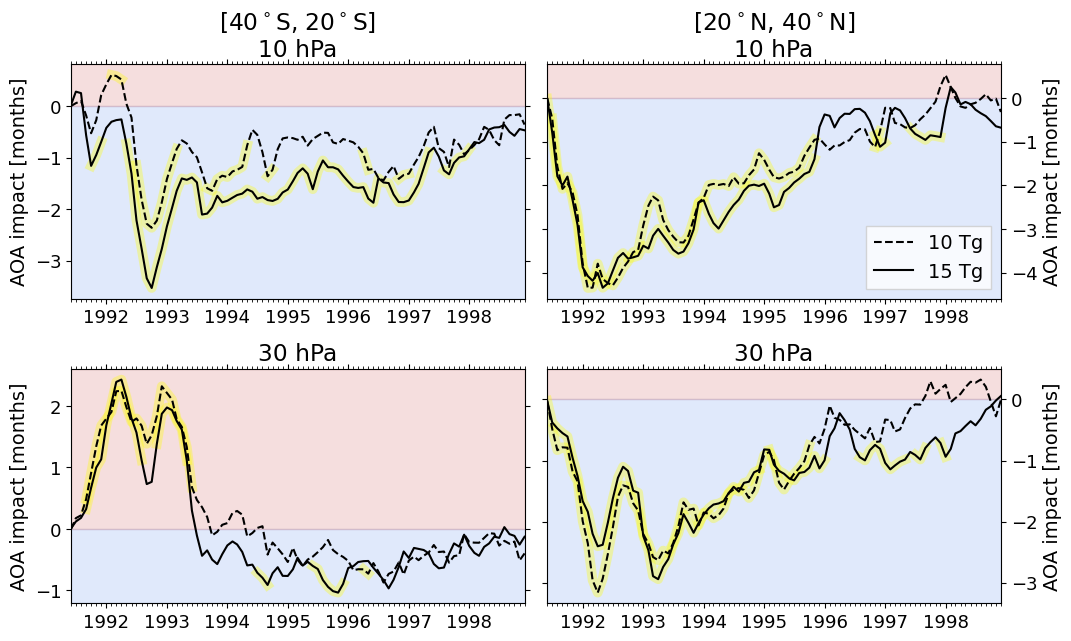

In [96]:

fig = plt.figure(figsize=(12,7))
ax30S = fig.add_subplot(223)
ax10S = fig.add_subplot(221)
ax30N = fig.add_subplot(224)
ax10N = fig.add_subplot(222)

c10, c15 = 'k', 'k'
ls10, ls15 = '--', '-'
sigcolor='yellow'

for pp in [10, 30]:
    
    if(pp==10): 
        ax1,ax2 = ax10S, ax10N
        ax2.set_title('[$20^\\circ$N, $40^\\circ$N]\n10 hPa')
        ax1.set_title('[$20^\\circ$S, $40^\\circ$S]\n10 hPa')
    if(pp==30): 
        ax1,ax2 = ax30S, ax30N
        ax2.set_title('30 hPa')
        ax1.set_title('30 hPa')
    
    # ------ NH
    aoa10    = aoa_nh_10['impact'].sel(plev=pp, method='nearest') / 30
    aoa10sig = aoa_nh_10['pval'].sel(plev=pp, method='nearest')
    aoa10sig = aoa10.where(aoa10sig <=0.05)
    aoa15    = aoa_nh_15['impact'].sel(plev=pp, method='nearest') / 30
    aoa15sig = aoa_nh_15['pval'].sel(plev=pp, method='nearest')
    aoa15sig = aoa15.where(aoa15sig <=0.05)

    ax2.plot(time, aoa10sig, color=sigcolor, lw=7, alpha=0.33)
    ax2.plot(time, aoa15sig, color=sigcolor, lw=7, alpha=0.33)
    ax2.plot(time, aoa10, color=c10, ls=ls10, label='10 Tg')
    ax2.plot(time, aoa15, color=c15, ls=ls15, label='15 Tg')
    if(pp==10):
        ax2.legend(loc='lower right', fancybox=False, fontsize=14)

    ylim = ax2.get_ylim()
    ax2.fill_between(x=time, y1=ylim[0], y2=[0], color='cornflowerblue', alpha=0.2)
    ax2.fill_between(x=time, y1=[0], y2=ylim[1], color='indianred', alpha=0.2)
    ax2.set_ylim(ylim)
    
    ax2.set_xlim([time[0], time[-1]])
    putil.season_timeticks(ax=ax2, option='year', times=time)
    putil.format_ticks(ax2, y='right')

    # ------ SH
    aoa10    = aoa_sh_10['impact'].sel(plev=pp, method='nearest') / 30
    aoa10sig = aoa_sh_10['pval'].sel(plev=pp, method='nearest')
    aoa10sig = aoa10.where(aoa10sig <=0.05)
    aoa15    = aoa_sh_15['impact'].sel(plev=pp, method='nearest') / 30
    aoa15sig = aoa_sh_15['pval'].sel(plev=pp, method='nearest')
    aoa15sig = aoa15.where(aoa15sig <=0.05)

    ax1.plot(time, aoa10sig, color=sigcolor, lw=7, alpha=0.33)
    ax1.plot(time, aoa15sig, color=sigcolor, lw=7, alpha=0.33)
    ax1.plot(time, aoa10, color=c10, ls=ls10)
    ax1.plot(time, aoa15, color=c15, ls=ls15)
    
    ylim = ax1.get_ylim()
    ax1.fill_between(x=time, y1=ylim[0], y2=[0], color='cornflowerblue', alpha=0.2)
    ax1.fill_between(x=time, y1=[0], y2=ylim[1], color='indianred', alpha=0.2)
    ax1.set_ylim(ylim)
    
    ax1.set_xlim([time[0], time[-1]])
    putil.season_timeticks(ax=ax1, option='year', times=time)
    putil.format_ticks(ax1)
    
    ax1.set_ylabel('AOA impact [months]')
    ax2.set_ylabel('AOA impact [months]')

plt.subplots_adjust(wspace=0.05, hspace=0.3)
plt.show()

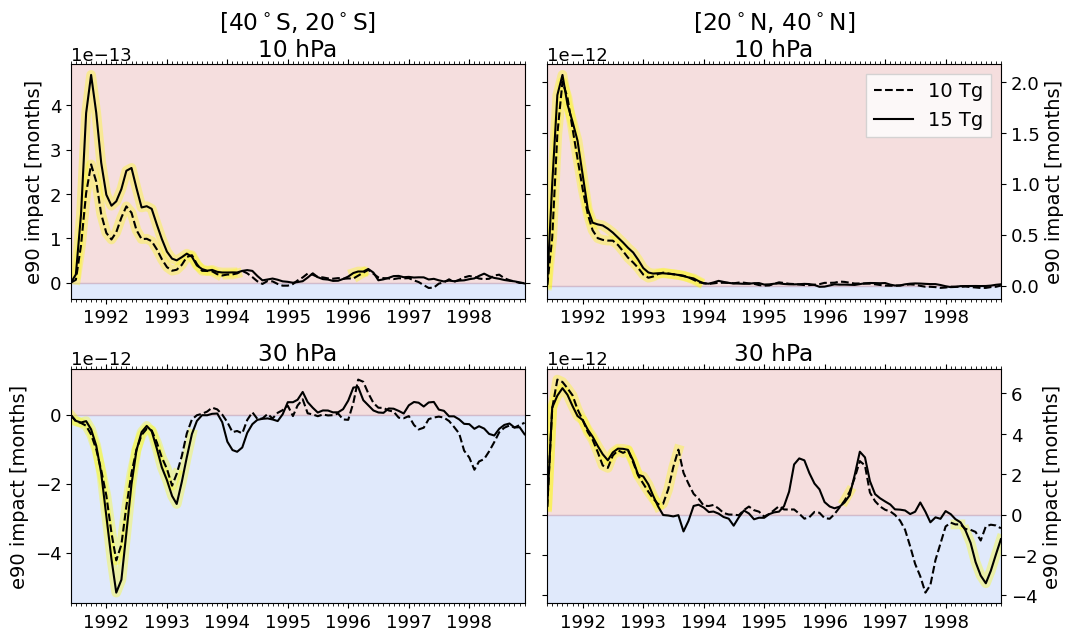

In [98]:

fig = plt.figure(figsize=(12,7))
ax30S = fig.add_subplot(223)
ax10S = fig.add_subplot(221)
ax30N = fig.add_subplot(224)
ax10N = fig.add_subplot(222)

c10, c15 = 'k', 'k'
ls10, ls15 = '--', '-'
sigcolor='yellow'

for pp in [10, 30]:
    
    if(pp==10): 
        ax1,ax2 = ax10S, ax10N
        ax2.set_title('[$20^\\circ$N, $40^\\circ$N]\n10 hPa')
        ax1.set_title('[$20^\\circ$S, $40^\\circ$S]\n10 hPa')
    if(pp==30): 
        ax1,ax2 = ax30S, ax30N
        ax2.set_title('30 hPa')
        ax1.set_title('30 hPa')
    
    # ------ NH
    e9010    = e90_nh_10['impact'].sel(plev=pp, method='nearest') / 30
    e9010sig = e90_nh_10['pval'].sel(plev=pp, method='nearest')
    e9010sig = e9010.where(e9010sig <=0.05)
    e9015    = e90_nh_15['impact'].sel(plev=pp, method='nearest') / 30
    e9015sig = e90_nh_15['pval'].sel(plev=pp, method='nearest')
    e9015sig = e9015.where(e9015sig <=0.05)

    ax2.plot(time, e9010sig, color=sigcolor, lw=7, alpha=0.33)
    ax2.plot(time, e9015sig, color=sigcolor, lw=7, alpha=0.33)
    ax2.plot(time, e9010, color=c10, ls=ls10, label='10 Tg')
    ax2.plot(time, e9015, color=c15, ls=ls15, label='15 Tg')
    if(pp==10):
        ax2.legend(loc='upper right', fancybox=False, fontsize=14)

    ylim = ax2.get_ylim()
    ax2.fill_between(x=time, y1=ylim[0], y2=[0], color='cornflowerblue', alpha=0.2)
    ax2.fill_between(x=time, y1=[0], y2=ylim[1], color='indianred', alpha=0.2)
    ax2.set_ylim(ylim)
    
    ax2.set_xlim([time[0], time[-1]])
    putil.season_timeticks(ax=ax2, option='year', times=time)
    putil.format_ticks(ax2, y='right')

    # ------ SH
    e9010    = e90_sh_10['impact'].sel(plev=pp, method='nearest') / 30
    e9010sig = e90_sh_10['pval'].sel(plev=pp, method='nearest')
    e9010sig = e9010.where(e9010sig <=0.05)
    e9015    = e90_sh_15['impact'].sel(plev=pp, method='nearest') / 30
    e9015sig = e90_sh_15['pval'].sel(plev=pp, method='nearest')
    e9015sig = e9015.where(e9015sig <=0.05)

    ax1.plot(time, e9010sig, color=sigcolor, lw=7, alpha=0.33)
    ax1.plot(time, e9015sig, color=sigcolor, lw=7, alpha=0.33)
    ax1.plot(time, e9010, color=c10, ls=ls10)
    ax1.plot(time, e9015, color=c15, ls=ls15)
    
    ylim = ax1.get_ylim()
    ax1.fill_between(x=time, y1=ylim[0], y2=[0], color='cornflowerblue', alpha=0.2)
    ax1.fill_between(x=time, y1=[0], y2=ylim[1], color='indianred', alpha=0.2)
    ax1.set_ylim(ylim)
    
    ax1.set_xlim([time[0], time[-1]])
    putil.season_timeticks(ax=ax1, option='year', times=time)
    putil.format_ticks(ax1)
    
    ax1.set_ylabel('e90 impact [months]')
    ax2.set_ylabel('e90 impact [months]')

plt.subplots_adjust(wspace=0.05, hspace=0.3)
plt.show()